# **Fashion-MNIST Dataset**

In [1]:
import tensorflow as tf
Adam = tf.keras.optimizers.Adam
to_categorical = tf.keras.utils.to_categorical
ImageDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator
fashion_mnist = tf.keras.datasets.fashion_mnist
load_img = tf.keras.preprocessing.image.load_img
img_to_array = tf.keras.preprocessing.image.img_to_array

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import plotly.graph_objs as go
from plotly import subplots
import plotly

import warnings
warnings.filterwarnings('ignore')

In [2]:
IMG_ROWS = 28
IMG_COLS = 28
NUM_CLASSES = 10
VAL_SIZE = 0.2
RANDOM_STATE = 99
BATCH_SIZE = 256

In [3]:
(train_data, y), (test_data, y_test) = fashion_mnist.load_data()

print("Fashion MNIST train -  rows:",train_data.shape[0]," columns:", train_data.shape[1], " rows:", train_data.shape[2])
print("Fashion MNIST test -  rows:",test_data.shape[0]," columns:", test_data.shape[1], " rows:", train_data.shape[2])

4431872/4422102 [==============================] - 0s 0us/step
Fashion MNIST train -  rows: 60000  columns: 28  rows: 28
Fashion MNIST test -  rows: 10000  columns: 28  rows: 28


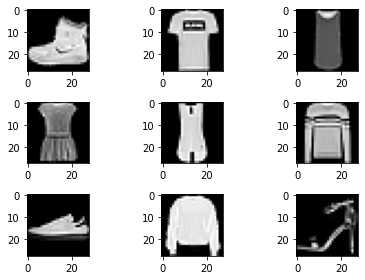

In [4]:
for i in range(9):
    plt.subplot(330 + 1 + i)    
    plt.imshow(train_data[i], cmap=plt.get_cmap('gray'))

plt.tight_layout()
plt.savefig('fashion_mnist.jpeg', dpi=300)

In [5]:
print(train_data.shape, test_data.shape)

train_data = train_data.reshape((train_data.shape[0], 28, 28, 1))
test_data = test_data.reshape((test_data.shape[0], 28, 28, 1))

print(train_data.shape, test_data.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


In [6]:
train_data = train_data / 255.0
test_data = test_data / 255.0

In [7]:
print(y.shape, y_test.shape)
print(y[:10])

(60000,) (10000,)
[9 0 0 3 0 2 7 2 5 5]


In [8]:
y = to_categorical(y)
y_test = to_categorical(y_test)

print(y.shape, y_test.shape)
y[:10]

(60000, 10) (10000, 10)


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [9]:
x_train, x_val, y_train, y_val = train_test_split(train_data, y, test_size=VAL_SIZE, random_state=RANDOM_STATE)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

# **Baseline Model**

In [10]:
# model = Sequential()
model = tf.keras.Sequential()

#1. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.Activation("relu"))

#2. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same'))
model.add(tf.keras.layers.Activation("relu"))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

#3. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same'))
model.add(tf.keras.layers.Activation("relu"))

#4. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same'))
model.add(tf.keras.layers.Activation("relu"))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

#FULLY CONNECTED LAYER
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.Activation("relu"))

#OUTPUT LAYER
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [11]:
optimizer = Adam()
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                        

In [12]:
NO_EPOCHS = 10

history = model.fit(x_train, y_train,
                  batch_size=BATCH_SIZE,
                  epochs=NO_EPOCHS,
                  verbose=1,
                  validation_data=(x_val, y_val))

Epoch 1/10
188/188 [==============================] - 11s 12ms/step - loss: 0.5628 - accuracy: 0.7972 - val_loss: 0.3535 - val_accuracy: 0.8716
Epoch 2/10
188/188 [==============================] - 2s 10ms/step - loss: 0.3143 - accuracy: 0.8858 - val_loss: 0.3042 - val_accuracy: 0.8903
Epoch 3/10
188/188 [==============================] - 2s 10ms/step - loss: 0.2576 - accuracy: 0.9060 - val_loss: 0.2541 - val_accuracy: 0.9070
Epoch 4/10
188/188 [==============================] - 2s 10ms/step - loss: 0.2225 - accuracy: 0.9193 - val_loss: 0.2444 - val_accuracy: 0.9097
Epoch 5/10
188/188 [==============================] - 2s 10ms/step - loss: 0.2020 - accuracy: 0.9252 - val_loss: 0.2514 - val_accuracy: 0.9087
Epoch 6/10
188/188 [==============================] - 2s 10ms/step - loss: 0.1775 - accuracy: 0.9332 - val_loss: 0.2220 - val_accuracy: 0.9184
Epoch 7/10
188/188 [==============================] - 2s 10ms/step - loss: 0.1547 - accuracy: 0.9424 - val_loss: 0.2235 - val_accuracy: 0.920

In [13]:
def create_trace(x,y,ylabel,color):
        trace = go.Scatter(
            x = x,y = y,
            name=ylabel,
            marker=dict(color=color),
            mode = "markers+lines",
            text=x
        )
        return trace
    
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1,len(acc)+1))
    
    trace_ta = create_trace(epochs,acc,"Training accuracy", "Green")
    trace_va = create_trace(epochs,val_acc,"Validation accuracy", "Red")
    trace_tl = create_trace(epochs,loss,"Training loss", "Blue")
    trace_vl = create_trace(epochs,val_loss,"Validation loss", "Magenta")
   
    fig = subplots.make_subplots(rows=1,cols=2, subplot_titles=('Training and validation accuracy',
                                                             'Training and validation loss'))
    fig.append_trace(trace_ta,1,1)
    fig.append_trace(trace_va,1,1)
    fig.append_trace(trace_tl,1,2)
    fig.append_trace(trace_vl,1,2)
    fig['layout']['xaxis'].update(title = 'Epoch')
    fig['layout']['xaxis2'].update(title = 'Epoch')
    fig['layout']['yaxis'].update(title = 'Accuracy', range=[0,1])
    fig['layout']['yaxis2'].update(title = 'Loss', range=[0,1])

    plotly.offline.iplot(fig, filename='accuracy-loss')

In [14]:
plot_accuracy_and_loss(history)

In [15]:
score = model.evaluate(test_data, y_test,verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

Test Loss: 0.24431340396404266
Test Accuracy: 0.9236999750137329


# **Image Augmentation**

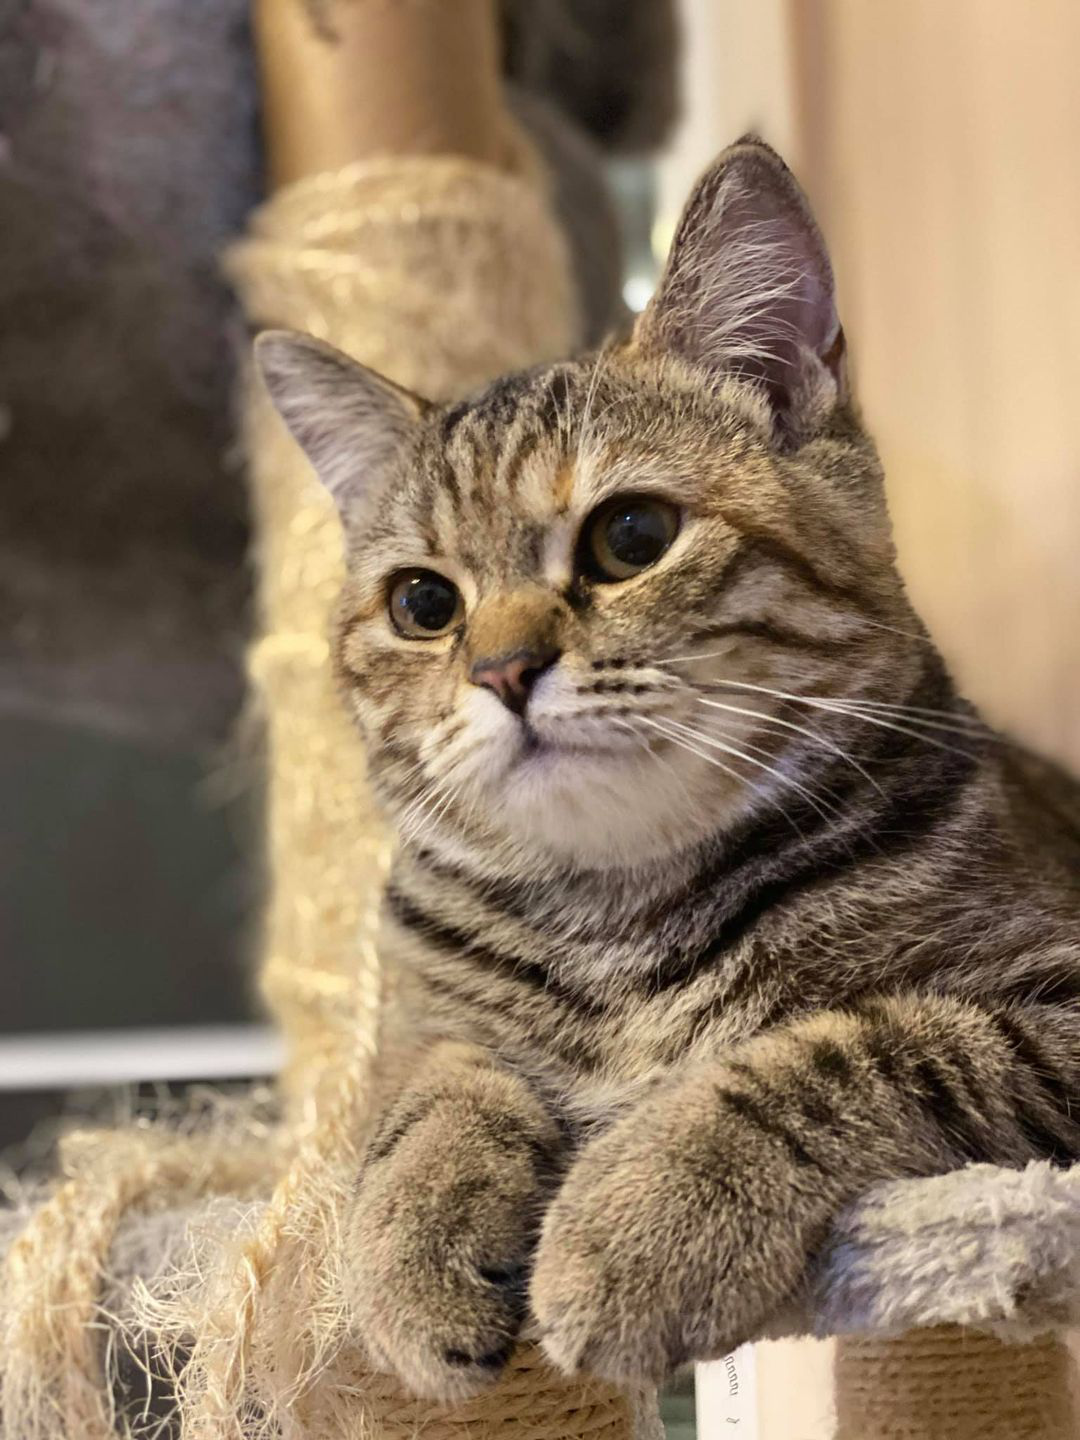

In [16]:
cat = load_img('cat.jpg')
cat

In [17]:
cat = img_to_array(cat)
print(cat.shape)
cat = cat.reshape(1,cat.shape[0],cat.shape[1],cat.shape[2])
print(cat.shape)

(1440, 1080, 3)
(1, 1440, 1080, 3)


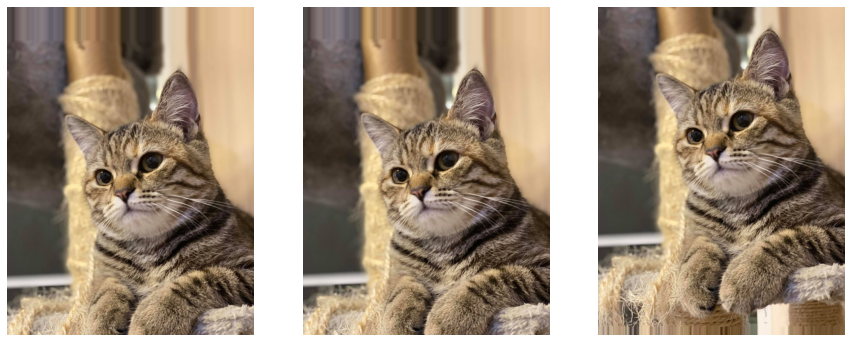

In [18]:
datagen = ImageDataGenerator(height_shift_range=0.2)

aug_iter = datagen.flow(cat, batch_size=1)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

for i in range(3):
    image = next(aug_iter)[0].astype('uint8')
    ax[i].imshow(image)
    ax[i].axis('off')
    
fig.savefig('cat1.jpeg', dpi=300)

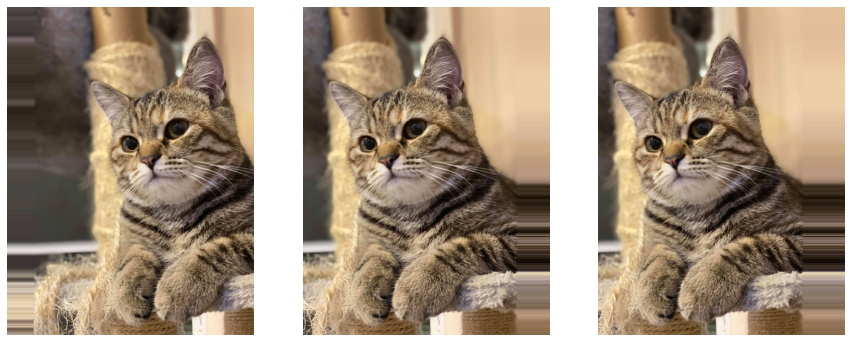

In [19]:
datagen = ImageDataGenerator(width_shift_range=0.2)

aug_iter = datagen.flow(cat, batch_size=1)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

for i in range(3):
    image = next(aug_iter)[0].astype('uint8')
    ax[i].imshow(image)
    ax[i].axis('off')
    
fig.savefig('cat2.jpeg', dpi=300)

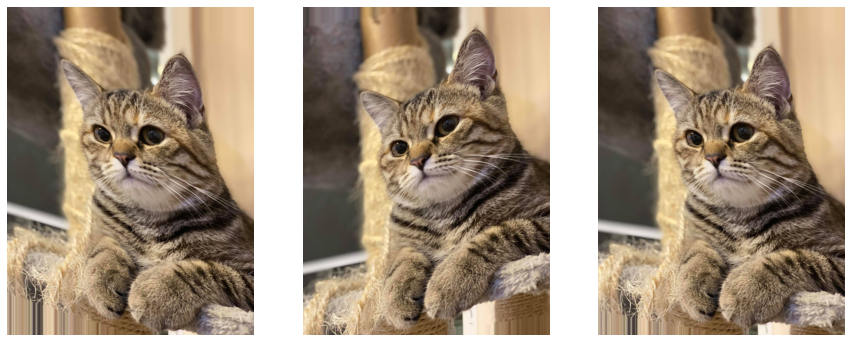

In [20]:
datagen = ImageDataGenerator(shear_range=20)

aug_iter = datagen.flow(cat, batch_size=1)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

for i in range(3):
    image = next(aug_iter)[0].astype('uint8')
    ax[i].imshow(image)
    ax[i].axis('off')
    
fig.savefig('cat3.jpeg', dpi=300)

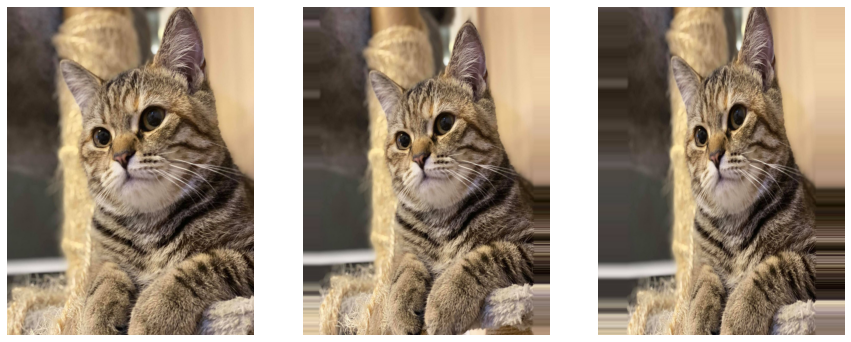

In [21]:
datagen = ImageDataGenerator(zoom_range=0.3)

aug_iter = datagen.flow(cat, batch_size=1)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

for i in range(3):
    image = next(aug_iter)[0].astype('uint8')
    ax[i].imshow(image)
    ax[i].axis('off')
    
fig.savefig('cat4.jpeg', dpi=300)

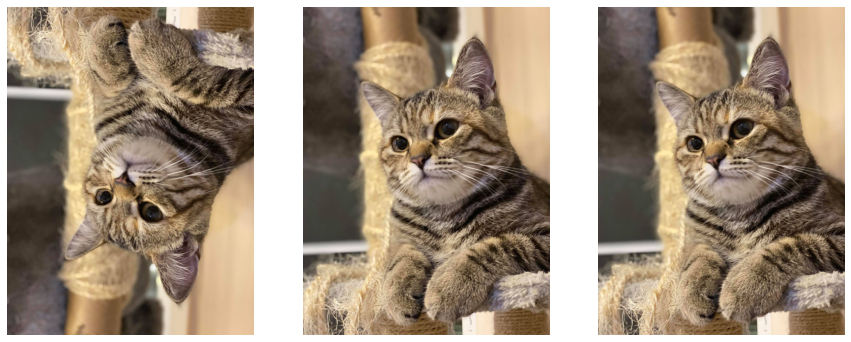

In [22]:
datagen = ImageDataGenerator(vertical_flip=True)

aug_iter = datagen.flow(cat, batch_size=1)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

for i in range(3):
    image = next(aug_iter)[0].astype('uint8')
    ax[i].imshow(image)
    ax[i].axis('off')
    
fig.savefig('cat5.jpeg', dpi=300)

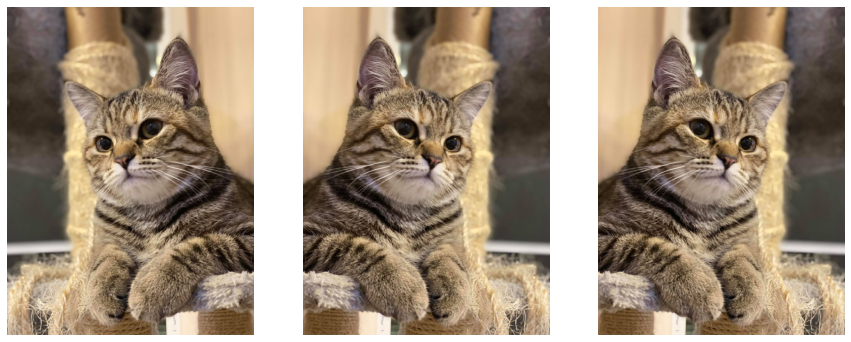

In [23]:
datagen = ImageDataGenerator(horizontal_flip=True)

aug_iter = datagen.flow(cat, batch_size=1)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

for i in range(3):
    image = next(aug_iter)[0].astype('uint8')
    ax[i].imshow(image)
    ax[i].axis('off')
    
fig.savefig('cat6.jpeg', dpi=300)

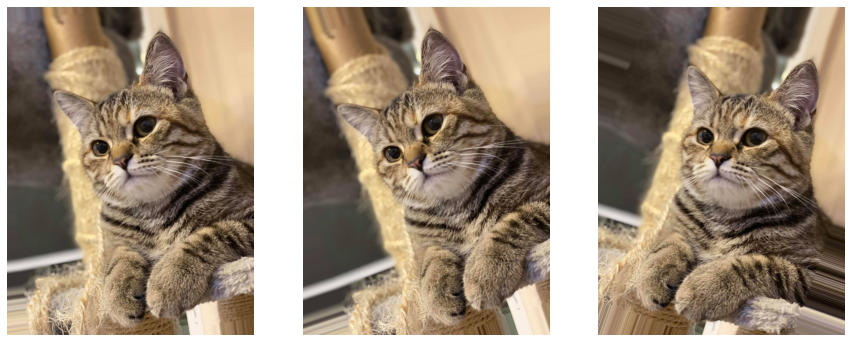

In [24]:
datagen = ImageDataGenerator(rotation_range=30)

aug_iter = datagen.flow(cat, batch_size=1)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

for i in range(3):
    image = next(aug_iter)[0].astype('uint8')
    ax[i].imshow(image)
    ax[i].axis('off')
    
fig.savefig('cat7.jpeg', dpi=300)

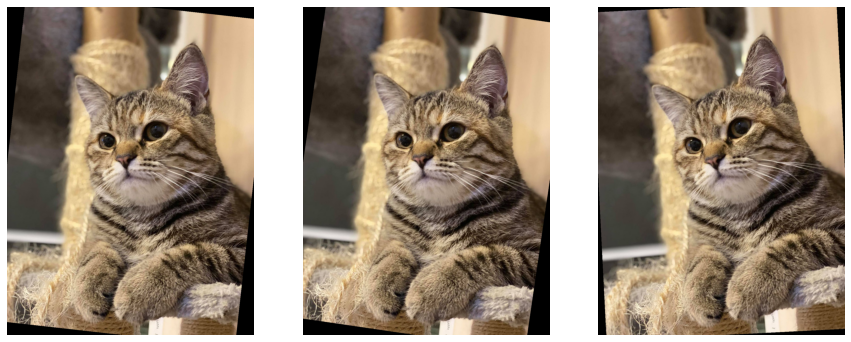

In [25]:
datagen = ImageDataGenerator(rotation_range=30, fill_mode = 'constant')

aug_iter = datagen.flow(cat, batch_size=1)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

for i in range(3):
    image = next(aug_iter)[0].astype('uint8')
    ax[i].imshow(image)
    ax[i].axis('off')
    
fig.savefig('cat8.jpeg', dpi=300)

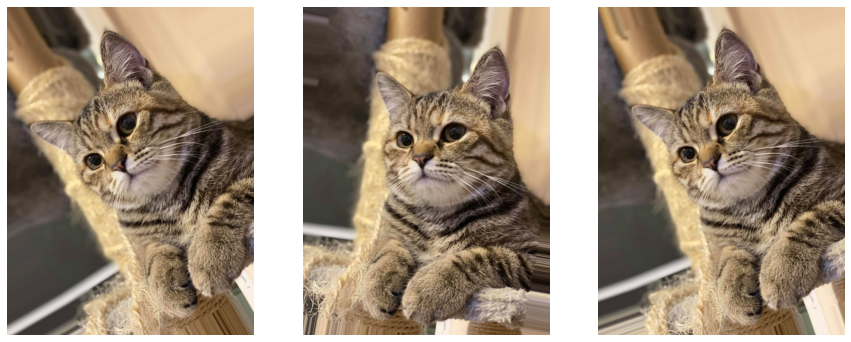

In [26]:
datagen = ImageDataGenerator(rotation_range=30, fill_mode = 'nearest')

aug_iter = datagen.flow(cat, batch_size=1)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

for i in range(3):
    image = next(aug_iter)[0].astype('uint8')
    ax[i].imshow(image)
    ax[i].axis('off')
    
fig.savefig('cat9.jpeg', dpi=300)

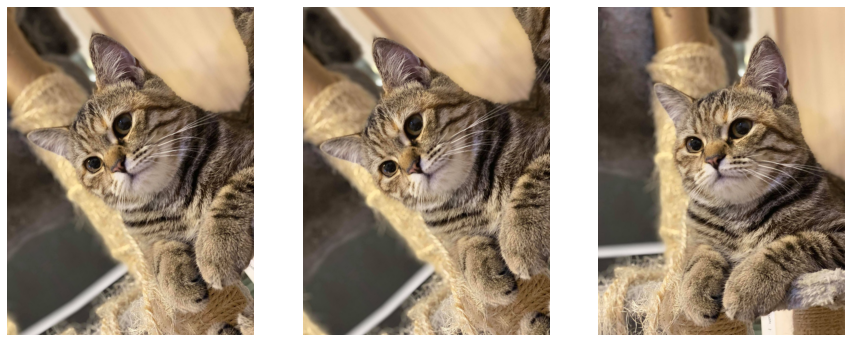

In [27]:
datagen = ImageDataGenerator(rotation_range=50, fill_mode = 'reflect')

aug_iter = datagen.flow(cat, batch_size=1)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

for i in range(3):
    image = next(aug_iter)[0].astype('uint8')
    ax[i].imshow(image)
    ax[i].axis('off')
    
fig.savefig('cat10.jpeg', dpi=300)

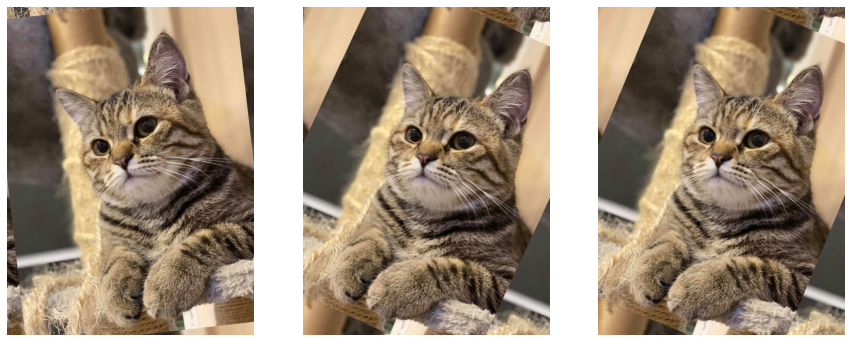

In [28]:
datagen = ImageDataGenerator(rotation_range=30, fill_mode = 'wrap')

aug_iter = datagen.flow(cat, batch_size=1)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

for i in range(3):
    image = next(aug_iter)[0].astype('uint8')
    ax[i].imshow(image)
    ax[i].axis('off')
    
fig.savefig('cat11.jpeg', dpi=300)

In [29]:
datagen = ImageDataGenerator(
        rotation_range=0.05,    #Randomly rotate images in the range
        zoom_range = 0.2,       #Randomly zoom image
        width_shift_range=0.1,  #Randomly shift images horizontally
        height_shift_range=0.1, #Randomly shift images vertically
        shear_range=0.05        #Randomly shear images
)

datagen.fit(x_train)

In [30]:
x_batch = datagen.flow(x_train, y_train, batch_size=9).next()
x_batch[0].shape

(9, 28, 28, 1)

In [31]:
x_batch = x_batch[0].reshape((x_batch[0].shape[0], 28, 28))
x_batch.shape

(9, 28, 28)

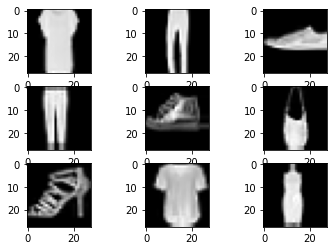

In [32]:
for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_batch[i], cmap=plt.get_cmap('gray'))
    
plt.savefig('fashion_mnist2.jpeg', dpi=300)

In [33]:
# model = Sequential()
model = tf.keras.Sequential()

#1. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.Activation("relu"))

#2. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same'))
model.add(tf.keras.layers.Activation("relu"))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

#3. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same'))
model.add(tf.keras.layers.Activation("relu"))

#4. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same'))
model.add(tf.keras.layers.Activation("relu"))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

#FULLY CONNECTED LAYER
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.Activation("relu"))

#OUTPUT LAYER
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [34]:
optimizer = Adam()
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 activation_5 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 activation_6 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 64)        18496     
                                                      

In [35]:
NO_EPOCHS = 50

history = model.fit(datagen.flow(x_train, y_train, batch_size=BATCH_SIZE),
                              shuffle=True,
                              epochs=NO_EPOCHS, validation_data = (x_val, y_val),
                              verbose=1, steps_per_epoch=x_train.shape[0] // BATCH_SIZE)

Epoch 1/50
187/187 [==============================] - 12s 61ms/step - loss: 0.7633 - accuracy: 0.7176 - val_loss: 0.4579 - val_accuracy: 0.8297
Epoch 2/50
187/187 [==============================] - 11s 60ms/step - loss: 0.5025 - accuracy: 0.8129 - val_loss: 0.3684 - val_accuracy: 0.8652
Epoch 3/50
187/187 [==============================] - 11s 60ms/step - loss: 0.4308 - accuracy: 0.8379 - val_loss: 0.3564 - val_accuracy: 0.8692
Epoch 4/50
187/187 [==============================] - 11s 60ms/step - loss: 0.3940 - accuracy: 0.8518 - val_loss: 0.3467 - val_accuracy: 0.8683
Epoch 5/50
187/187 [==============================] - 12s 62ms/step - loss: 0.3584 - accuracy: 0.8663 - val_loss: 0.2878 - val_accuracy: 0.8922
Epoch 6/50
187/187 [==============================] - 11s 61ms/step - loss: 0.3419 - accuracy: 0.8725 - val_loss: 0.2670 - val_accuracy: 0.9028
Epoch 7/50
187/187 [==============================] - 11s 61ms/step - loss: 0.3154 - accuracy: 0.8817 - val_loss: 0.2647 - val_accuracy:

In [36]:
plot_accuracy_and_loss(history)

In [37]:
score = model.evaluate(test_data, y_test,verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

Test Loss: 0.2332528531551361
Test Accuracy: 0.9286999702453613


# **Batch Normalization**

In [38]:
datagen = ImageDataGenerator(
        rotation_range=0.05,    #Randomly rotate images in the range
        zoom_range = 0.2,       #Randomly zoom image
        width_shift_range=0.1,  #Randomly shift images horizontally
        height_shift_range=0.1, #Randomly shift images vertically
        shear_range=0.05
)

datagen.fit(x_train)

In [39]:
# model = Sequential()
model = tf.keras.Sequential()

#1. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("relu"))

#2. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("relu"))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

#3. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("relu"))

#4. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("relu"))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

#FULLY CONNECTED LAYER
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("relu"))

#OUTPUT LAYER
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [40]:
optimizer = Adam()
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 activation_10 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_11 (Activation)  (None, 28, 28, 32)       

In [41]:
NO_EPOCHS = 50
history = model.fit(datagen.flow(x_train, y_train, batch_size=BATCH_SIZE),
                              shuffle=True,
                              epochs=NO_EPOCHS, validation_data = (x_val, y_val),
                              verbose=1, steps_per_epoch=x_train.shape[0] // BATCH_SIZE)

Epoch 1/50
187/187 [==============================] - 12s 61ms/step - loss: 0.5375 - accuracy: 0.8002 - val_loss: 3.1962 - val_accuracy: 0.1068
Epoch 2/50
187/187 [==============================] - 11s 61ms/step - loss: 0.3777 - accuracy: 0.8586 - val_loss: 1.7540 - val_accuracy: 0.4213
Epoch 3/50
187/187 [==============================] - 11s 60ms/step - loss: 0.3337 - accuracy: 0.8761 - val_loss: 0.3485 - val_accuracy: 0.8747
Epoch 4/50
187/187 [==============================] - 11s 60ms/step - loss: 0.3076 - accuracy: 0.8846 - val_loss: 0.2955 - val_accuracy: 0.8900
Epoch 5/50
187/187 [==============================] - 11s 60ms/step - loss: 0.2859 - accuracy: 0.8926 - val_loss: 0.2578 - val_accuracy: 0.9014
Epoch 6/50
187/187 [==============================] - 11s 60ms/step - loss: 0.2746 - accuracy: 0.8978 - val_loss: 0.2970 - val_accuracy: 0.8913
Epoch 7/50
187/187 [==============================] - 11s 61ms/step - loss: 0.2609 - accuracy: 0.9033 - val_loss: 0.3002 - val_accuracy:

In [42]:
plot_accuracy_and_loss(history)

In [43]:
score = model.evaluate(test_data, y_test,verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

Test Loss: 0.23073142766952515
Test Accuracy: 0.9276999831199646


# **Dropout**

In [44]:
datagen = ImageDataGenerator(
        rotation_range=0.05,    #Randomly rotate images in the range
        zoom_range=0.2,         #Randomly zoom image
        width_shift_range=0.1,  #Randomly shift images horizontally
        height_shift_range=0.1, #Randomly shift images vertically
        shear_range=0.05        #Randomly shear images
)

datagen.fit(x_train)

In [45]:
# model = Sequential()
model = tf.keras.Sequential()

#1. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.Dropout(0.3))

#2. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("relu"))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.3))

#3. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.Dropout(0.3))

#4. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("relu"))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.3))


#FULLY CONNECTED LAYER
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.Dropout(0.30))

#OUTPUT LAYER
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [46]:
optimizer = Adam()
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_5 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_15 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 dropout (Dropout)           (None, 28, 28, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_6 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                      

In [47]:
NO_EPOCHS = 200

history = model.fit(datagen.flow(x_train, y_train, batch_size=BATCH_SIZE),
                              shuffle=True,
                              epochs=NO_EPOCHS, validation_data = (x_val, y_val),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // BATCH_SIZE)

Epoch 1/200
187/187 [==============================] - 13s 63ms/step - loss: 0.8238 - accuracy: 0.6918 - val_loss: 3.7417 - val_accuracy: 0.2016
Epoch 2/200
187/187 [==============================] - 11s 61ms/step - loss: 0.5915 - accuracy: 0.7736 - val_loss: 2.5833 - val_accuracy: 0.2967
Epoch 3/200
187/187 [==============================] - 11s 61ms/step - loss: 0.5165 - accuracy: 0.8061 - val_loss: 0.5590 - val_accuracy: 0.7849
Epoch 4/200
187/187 [==============================] - 11s 61ms/step - loss: 0.4636 - accuracy: 0.8250 - val_loss: 0.4414 - val_accuracy: 0.8344
Epoch 5/200
187/187 [==============================] - 11s 61ms/step - loss: 0.4333 - accuracy: 0.8385 - val_loss: 0.3357 - val_accuracy: 0.8738
Epoch 6/200
187/187 [==============================] - 11s 61ms/step - loss: 0.4095 - accuracy: 0.8468 - val_loss: 0.3271 - val_accuracy: 0.8764
Epoch 7/200
187/187 [==============================] - 12s 61ms/step - loss: 0.3920 - accuracy: 0.8531 - val_loss: 0.2826 - val_ac

In [48]:
plot_accuracy_and_loss(history)

In [49]:
score = model.evaluate(test_data, y_test,verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

Test Loss: 0.17210854589939117
Test Accuracy: 0.9377999901771545
